# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

## Загрузка и обзор данных

### Загрузка

In [2]:
# загрузка данных
d_clients = pd.read_csv('D_clients.csv')
d_target = pd.read_csv('D_target.csv')
d_job = pd.read_csv('D_job.csv')
d_salary = pd.read_csv('D_salary.csv')
d_last_credit = pd.read_csv('D_last_credit.csv')
d_loan = pd.read_csv('D_loan.csv')
d_close_loan = pd.read_csv('D_close_loan.csv')
d_pens = pd.read_csv('D_pens.csv')
d_work = pd.read_csv('D_work.csv')



### Описание данных

In [3]:
tables = [('D_clients.csv', d_clients), ('D_job.csv', d_job), ('D_salary.csv', d_salary), ('D_work.csv', d_work),
          ('D_last_credit.csv', d_last_credit), ('D_pens.csv', d_pens), ('D_loan.csv',d_loan), ('D_close_loan', d_close_loan), ('D_target', d_target)]

for table_name, table in tables:
    num_rows = table.shape[0]
    num_duplicates = table.duplicated().sum()
    print(f'Информация о {table_name} содержится в таблице "{table_name}": {num_rows} строк, из них {num_duplicates} дубликатов')

Информация о D_clients.csv содержится в таблице "D_clients.csv": 16000 строк, из них 0 дубликатов
Информация о D_job.csv содержится в таблице "D_job.csv": 15223 строк, из них 0 дубликатов
Информация о D_salary.csv содержится в таблице "D_salary.csv": 15523 строк, из них 300 дубликатов
Информация о D_work.csv содержится в таблице "D_work.csv": 3 строк, из них 0 дубликатов
Информация о D_last_credit.csv содержится в таблице "D_last_credit.csv": 15223 строк, из них 0 дубликатов
Информация о D_pens.csv содержится в таблице "D_pens.csv": 2 строк, из них 0 дубликатов
Информация о D_loan.csv содержится в таблице "D_loan.csv": 21126 строк, из них 0 дубликатов
Информация о D_close_loan содержится в таблице "D_close_loan": 21126 строк, из них 0 дубликатов
Информация о D_target содержится в таблице "D_target": 15223 строк, из них 0 дубликатов


Дубликаты содержатся в таблице D_salary. Избавимся от них.

In [4]:
d_salary.drop_duplicates(keep='first', inplace=True)

Обратимся к таблицам d_clients и d_target.

In [5]:
d_clients.head(5)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


In [6]:
d_target.head(5)

,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


Соединим таблицы d_clients и d_target по полю ID_client.

In [7]:
result = pd.merge(d_clients, d_target, how='left', left_on='ID', right_on='ID_CLIENT').drop(columns=['ID_CLIENT'])

In [8]:
result.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,60099204.0,1.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,62244665.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,61050759.0,0.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,62079659.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,66583553.0,0.0


### Обработка таблицы d_salary



In [9]:
d_salary.head()

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


Соединим полученную таблицу с d_salary по полю ID_client.

In [10]:
result = pd.merge(result, d_salary, how='left', left_on='ID', right_on='ID_CLIENT').drop(columns=['ID_CLIENT'])

### Обработка таблицы d_last_credit


In [11]:
d_last_credit.head()

,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


Соединим полученную таблицу с d_last_credit по полю ID_client.

In [12]:
result = pd.merge(result, d_last_credit, how='left', left_on='ID', right_on='ID_CLIENT').drop(columns=['ID_CLIENT'])

### Обработка таблиц d_loan и d_close_loan

In [13]:
d_loan.head()

,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


In [14]:
d_close_loan.head()

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


Соберем информацию о закрытых кредитах.

In [15]:
loan_data= pd.merge(d_loan, d_close_loan, how='left', left_on='ID_LOAN', right_on='ID_LOAN')

In [16]:
loan_data

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1
...,...,...,...
21121,1753811779,106819588,1
21122,1753811780,106819589,0
21123,1753811781,106819590,0
21124,1753811782,106819591,0


Агрегируем данные по клиентам

In [17]:
loan_data_agg = loan_data.groupby('ID_CLIENT', as_index=False).agg(LOAN_NUM_TOTAL  =  ('ID_LOAN', 'count'), LOAN_NUM_CLOSED = ('CLOSED_FL', 'sum'))

Добавим информацию к итоговой таблице.

In [18]:
result = pd.merge(result, loan_data_agg, how='left', left_on='ID', right_on='ID_CLIENT').drop(columns=['ID_CLIENT'])

In [19]:
result.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,OWN_AUTO,AGREEMENT_RK,TARGET,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,0,60099204.0,1.0,от 20000 до 50000 руб.,25000.0,5588.0,6.0,1000.0,1.0,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,0,62244665.0,0.0,от 10000 до 20000 руб.,10000.0,19498.0,12.0,0.0,1.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,1,61050759.0,0.0,от 20000 до 50000 руб.,30000.0,15470.0,3.0,15000.0,1.0,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,1,62079659.0,0.0,от 20000 до 50000 руб.,25000.0,13960.0,6.0,2500.0,1.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,0,66583553.0,0.0,от 10000 до 20000 руб.,15000.0,11890.0,6.0,8000.0,2.0,2.0


### Итоговый результат

Полученные поля итоговой таблицы.

In [20]:
# информация о столбцах
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       16000 non-null  int64  
 1   AGE                      16000 non-null  int64  
 2   GENDER                   16000 non-null  int64  
 3   EDUCATION                16000 non-null  object 
 4   MARITAL_STATUS           16000 non-null  object 
 5   CHILD_TOTAL              16000 non-null  int64  
 6   DEPENDANTS               16000 non-null  int64  
 7   SOCSTATUS_WORK_FL        16000 non-null  int64  
 8   SOCSTATUS_PENS_FL        16000 non-null  int64  
 9   REG_ADDRESS_PROVINCE     16000 non-null  object 
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object 
 12  FL_PRESENCE_FL           16000 non-null  int64  
 13  OWN_AUTO                 16000 non-null  int64  
 14  AGREEMENT_RK          

In [21]:
# информация о числовых колонках
result.describe()

,ID,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
count,1.600000e+04,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,1.068124e+08,40.394750,0.65325,1.097562,0.644437,0.909375,0.134625,0.310188,0.116562,6.540183e+07,0.119030,13853.836323,14667.959345,8.101031,3398.562655,1.387769,0.751889
std,4.618946e+03,11.600365,0.47595,0.995731,0.811975,0.287084,0.341333,0.462585,0.321298,4.568181e+06,0.323835,9015.467617,12147.873496,4.094090,5158.108934,0.793566,0.988499
min,1.068044e+08,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.991015e+07,0.000000,24.000000,2000.000000,3.000000,0.000000,1.000000,0.000000
25%,1.068084e+08,30.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.192092e+07,0.000000,8000.000000,6500.000000,6.000000,1000.000000,1.000000,0.000000
50%,1.068124e+08,39.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.437100e+07,0.000000,12000.000000,11550.000000,6.000000,2000.000000,1.000000,0.000000
75%,1.068164e+08,50.000000,1.00000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,6.708802e+07,0.000000,17000.000000,19170.000000,10.000000,4000.000000,2.000000,1.000000
max,1.068204e+08,67.000000,1.00000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,7.529224e+07,1.000000,250000.000000,119700.000000,36.000000,140000.000000,11.000000,11.000000


In [22]:
result.head(5)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,OWN_AUTO,AGREEMENT_RK,TARGET,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,0,60099204.0,1.0,от 20000 до 50000 руб.,25000.0,5588.0,6.0,1000.0,1.0,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,0,62244665.0,0.0,от 10000 до 20000 руб.,10000.0,19498.0,12.0,0.0,1.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,1,61050759.0,0.0,от 20000 до 50000 руб.,30000.0,15470.0,3.0,15000.0,1.0,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,1,62079659.0,0.0,от 20000 до 50000 руб.,25000.0,13960.0,6.0,2500.0,1.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,0,66583553.0,0.0,от 10000 до 20000 руб.,15000.0,11890.0,6.0,8000.0,2.0,2.0


## Обработка полученного датасета

  Удаление идентификаторов, поскольку они не несут никакой значимой информации.

In [23]:
result.drop(columns = ['ID', 'AGREEMENT_RK'], inplace=True)

### Обработка пропусков

Посмотрим на пропуски в данных.

In [24]:
result.isna().sum()

AGE                          0
GENDER                       0
EDUCATION                    0
MARITAL_STATUS               0
CHILD_TOTAL                  0
DEPENDANTS                   0
SOCSTATUS_WORK_FL            0
SOCSTATUS_PENS_FL            0
REG_ADDRESS_PROVINCE         0
FACT_ADDRESS_PROVINCE        0
POSTAL_ADDRESS_PROVINCE      0
FL_PRESENCE_FL               0
OWN_AUTO                     0
TARGET                     777
FAMILY_INCOME              777
PERSONAL_INCOME            777
CREDIT                     777
TERM                       777
FST_PAYMENT                777
LOAN_NUM_TOTAL             777
LOAN_NUM_CLOSED            777
dtype: int64

In [25]:
#Удаление пропусков строк с пустым значением целевой переменной
result = result[~result['TARGET'].isna()]

In [26]:
result.isna().sum()

AGE                        0
GENDER                     0
EDUCATION                  0
MARITAL_STATUS             0
CHILD_TOTAL                0
DEPENDANTS                 0
SOCSTATUS_WORK_FL          0
SOCSTATUS_PENS_FL          0
REG_ADDRESS_PROVINCE       0
FACT_ADDRESS_PROVINCE      0
POSTAL_ADDRESS_PROVINCE    0
FL_PRESENCE_FL             0
OWN_AUTO                   0
TARGET                     0
FAMILY_INCOME              0
PERSONAL_INCOME            0
CREDIT                     0
TERM                       0
FST_PAYMENT                0
LOAN_NUM_TOTAL             0
LOAN_NUM_CLOSED            0
dtype: int64

In [27]:
cols = ['LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'TERM', 'TARGET']
result[cols] = result[cols].astype(int)

### Анализ выбросов (среди числовых значений)

In [28]:
num_columns = result.select_dtypes(include='float')
num_columns.head()

,PERSONAL_INCOME,CREDIT,FST_PAYMENT
0,25000.0,5588.0,1000.0
1,10000.0,19498.0,0.0
2,30000.0,15470.0,15000.0
3,25000.0,13960.0,2500.0
4,15000.0,11890.0,8000.0


Осталось проанализировать 3 признака: PERSONAL_INCOME, CREDIT, FST_PAYMENT.

#### Личный доход

Посмотрим на распределение личного дохода.

<Axes: xlabel='PERSONAL_INCOME', ylabel='Count'>

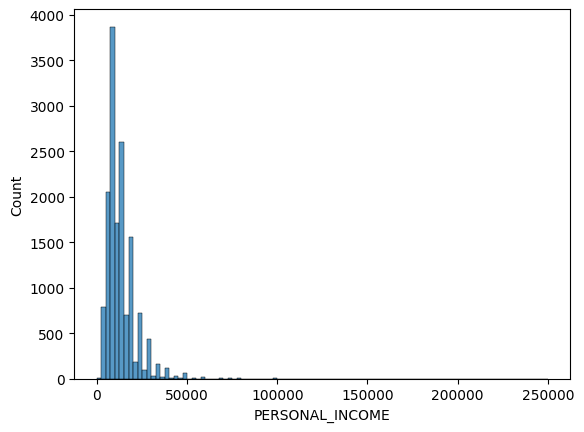

In [29]:
sns.histplot(data = result, x=result['PERSONAL_INCOME'], bins=100)

Наблюдаем длинный "хвост".

In [30]:
threshold_99_9 = np.nanpercentile(result['PERSONAL_INCOME'], 99.9)
result[result['PERSONAL_INCOME'] > threshold_99_9].shape

(14, 21)

Посмоотрим на левую границу.

In [31]:
min(result['PERSONAL_INCOME'])

24.0

Удалим эти объекты

In [32]:
result.drop(result[result['PERSONAL_INCOME'] > threshold_99_9].index, inplace=True)

In [33]:
result = result[result['PERSONAL_INCOME'] != result['PERSONAL_INCOME'].min()]

Посмотрим на новое распределение.

<Axes: xlabel='PERSONAL_INCOME', ylabel='Count'>

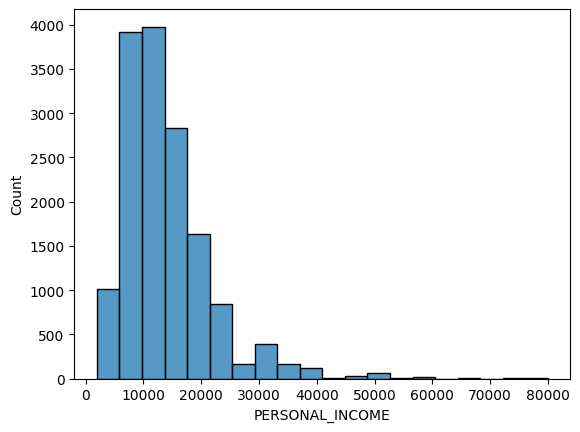

In [34]:

sns.histplot(data = result, x='PERSONAL_INCOME', bins=20)

#### Сумма кредита

Посмотрим на распределение суммы кредита.

<Axes: xlabel='CREDIT', ylabel='Count'>

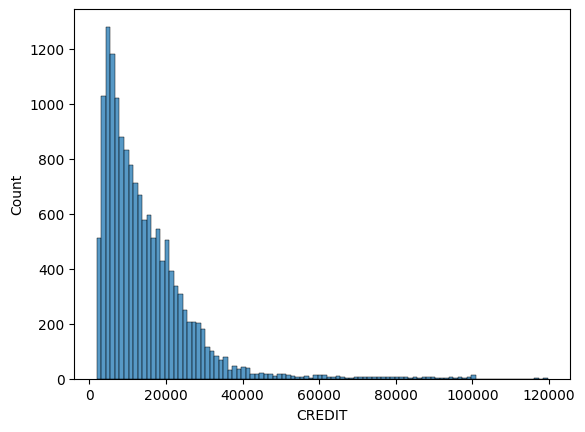

In [35]:
sns.histplot(data = result, x=result['CREDIT'], bins=100)

Снова наблюдаем длинный "хвост".

In [36]:
threshold_99_9 = np.nanpercentile(result['CREDIT'], 99.9)
result[result['CREDIT'] > threshold_99_9].shape

(16, 21)

Удалим эти объекты

In [37]:
result.drop(result[result['CREDIT'] > threshold_99_9].index, inplace=True)

Посмотрим на новое распределение.

<Axes: xlabel='CREDIT', ylabel='Count'>

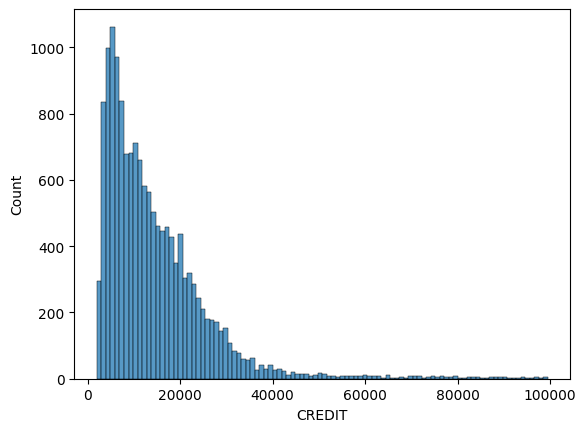

In [38]:
sns.histplot(data = result, x=result['CREDIT'], bins=100)

#### Первый платеж

<Axes: xlabel='FST_PAYMENT', ylabel='Count'>

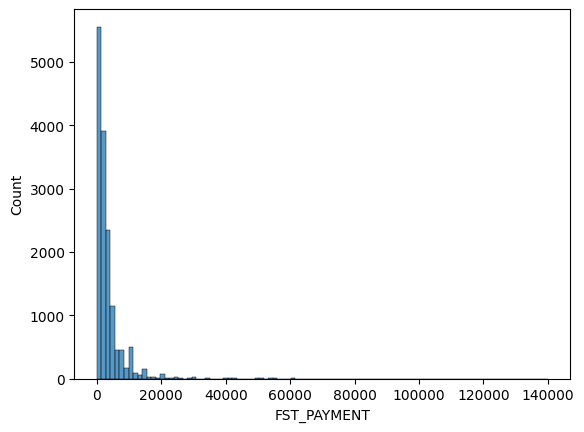

In [39]:
sns.histplot(data = result, x=result['FST_PAYMENT'], bins=100)

Снова наблюдаем длинный "хвост".

In [40]:
threshold_99_9 = np.nanpercentile(result['FST_PAYMENT'], 99.9)
result[result['FST_PAYMENT'] > threshold_99_9].shape


(16, 21)

Удалим эти объекты

In [41]:
result.drop(result[result['FST_PAYMENT'] > threshold_99_9].index, inplace=True)

Посмотрим на новое распределение.

<Axes: xlabel='FST_PAYMENT', ylabel='Count'>

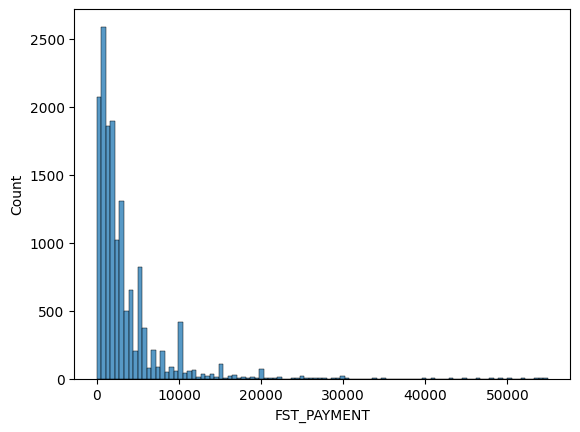

In [42]:
sns.histplot(data = result, x=result['FST_PAYMENT'], bins=100)

### Сохранение датасета

In [43]:
result.to_csv('clients_data.csv', index=False)

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.